In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import batman
from scipy import optimize

In [2]:
true_R_star = 1.23 #R_sun
true_R_planet = 0.78 #R_J
true_semi_major_axis = 0.034 #AU 


params = batman.TransitParams()
params.t0 = 0.                                          #time of inferior conjunction
params.per = 3.3                                        #orbital period (days)
params.rp = true_R_star * 0.10045 #R_Sun                #planet radius (in units of stellar radii)
params.a = (true_semi_major_axis * 215.032) / true_R_planet  #semi-major axis (in units of stellar radii))
params.inc = 89.1                                       #orbital inclination (in degrees)
params.ecc = 0.                                         #eccentricity
params.w = 90.                                          #longitude of periastron (in degrees)
params.limb_dark = "quadratic"                          #limb darkening model
params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.12, 0.12, 1000)                      #times at which to calculate light curve
m = batman.TransitModel(params, t)                      #initializes model
flux = m.light_curve(params)

In [3]:
print(params.rp)

0.1235535


In [4]:
sigma = 0.001
errs = np.random.normal(loc=0., scale=sigma, size=len(flux))
flux += errs

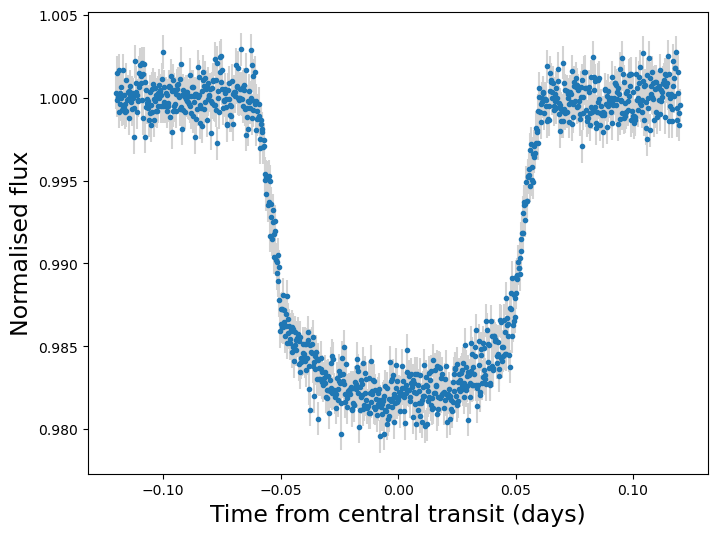

In [5]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.errorbar(t, flux, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")
plt.xlabel("Time from central transit (days)", size=17)
plt.ylabel("Normalised flux", size=17)
plt.show()

In [6]:
R_star = 1.23 #R_J
semi_major_axis = 0.034 #AU 


guess_params = batman.TransitParams()
guess_params.t0 = 0.                                          #time of inferior conjunction
guess_params.per = 3.3
                                                              #planet radius (in units of stellar radii)
guess_params.a = (semi_major_axis * 215.032) / R_star         #semi-major axis (in units of stellar radii))
guess_params.inc = 89.1                                       #orbital inclination (in degrees)
guess_params.ecc = 0.                                         #eccentricity
guess_params.w = 90.                                          #longitude of periastron (in degrees)
guess_params.limb_dark = "quadratic"                          #limb darkening model
guess_params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]


In [7]:
def log_likelihood(params):
    period, R_planet = params

    
    guess_params.rp = R_planet * 0.10045 #R_Sun   
    
    m = batman.TransitModel(guess_params, t) 

    y_m = m.light_curve(guess_params)
    flux = m.light_curve(guess_params)
        
    L = 0
    for y_i, y_m_i in zip(flux, y_m):
        L += (-0.5 * ((y_i - y_m_i)**2 / sigma**2))
    L = L + (len(t) / 2) * np.log(2 * np.pi * sigma**2) 

    return L

def log_prior(params):
    model_m, model_c = params

    P = 0.
    if model_m > 30:
        P += -np.inf 

    return P

def log_prob(params):
    return -(log_likelihood(params))# + log_prior(params))

In [10]:
guess = [0.03, 0.7]

likelihood_model = optimize.minimize(log_prob, guess)#, method='Nelder-Mead'
model_semi_major_axis, model_R_star = (likelihood_model['x'])

[3.1 0.7]


In [9]:
model_paramas = batman.TransitParams()

R_star = 1.23 #R_J

model_params = batman.TransitParams()
model_params.t0 = 0.                                          #time of inferior conjunction
params.per = 3.3                                              #orbital period (days)
params.rp = model_R_star * 0.10045 #R_Sun                      #planet radius (in units of stellar radii)
model_params.a = (semi_major_axis * 215.032) / model_R_star         #semi-major axis (in units of stellar radii))
model_params.inc = 89.1                                       #orbital inclination (in degrees)
model_params.ecc = 0.                                         #eccentricity
model_params.w = 90.                                          #longitude of periastron (in degrees)
model_params.limb_dark = "quadratic"                          #limb darkening model
model_params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]


model_m = batman.TransitModel(model_params, t)                      #initializes model
model_flux = m.light_curve(model_params)

0.07031500149682164


In [ ]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.errorbar(t, flux, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")

plt.xlabel("Time from central transit (days)", size=17)
plt.ylabel("Normalised flux", size=17)
plt.show()